#  <font color='red'> Multiclass Logistic regression for MNIST data </font> 
## You need to install mlxtend using the command 

<font color=red> conda install mlxtend --channel conda-forge </font>

Add the code below for logistic regression to classify 0 and 1

In [2]:
from matplotlib import cm
import matplotlib.pyplot as plt
from mlxtend.data import loadlocal_mnist
import platform
import numpy as np

plt.rcParams.update({'font.size': 16})
plt.rcParams['figure.figsize'] = [12, 6]


## Load the MNIST data

In [3]:
if not platform.system() == 'Windows':
    X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

else:
    X, y = loadlocal_mnist(
            images_path='train-images-idx3-ubyte', 
            labels_path='train-labels-idx1-ubyte')

Nclasses = 9
labelclasses = np.argwhere(y<Nclasses)[:,0]
Xnew = X[labelclasses,:]/1000
ynew = y[labelclasses]
Nfeatures = np.size(Xnew,1)
Nsamples = np.size(Xnew,0)

Xtilde = np.concatenate((Xnew,np.ones((Nsamples,1))),axis=1).T
ymatrix = np.zeros((Nsamples,Nclasses))
for i in range(Nclasses):
    ymatrix[:,i] = (ynew==i)

Y = ymatrix.T
print(Nsamples,Nclasses)

54051 9


The goal of multi-class logistic regression is to learn the coefficients $\mathbf w_i; i=1,..,N_{\rm classes}$ from $N_{\rm training}$ training data points such that the log-likelihood specified by 
$$L(\mathbf w_1,.. \mathbf w_M) = \sum_{i=1}^{N_{\rm classes}} \sum_{j=1}^{N_{\rm training}} y_{i,j} \ln(\color{red}{\phi_{i,j}} )$$

is minimized. Here, $\color{red}{\phi_{i,j}}$ are the learned labels, specified by

$$\color{red}{\phi_{j,i} = p(\omega_i|\mathbf x_j) =\frac{ \exp\left(\mathbf w_i^{T}\tilde{\mathbf x_j}\right)}{\sum_{i=1}^M\exp\left(\mathbf w_i^{T}\tilde{\mathbf x_j}\right)}}$$

Multiclass Logistic regression uses steepest descent to update $\mathbf w_i; i=1,..,N_{\rm classes}$ by minimizing the above log-likelihood. The gradient of the above cost function is specified by 
$$		\underbrace{\nabla_{\mathbf W} C}_{N_{\rm features}\times N_{\rm classes}} = \underbrace{\mathbf X}_{N_{\rm features}\times N_{\rm training}}\underbrace{(\mathbf \Phi -\mathbf Y)^T}_{N_{\rm training}\times N_{\rm classes}} $$

steepest descent rule is specified by 
$$\mathbf W_{i+1} \rightarrow \mathbf W_i - \color{blue}{\gamma}~~ \widetilde{\mathbf X}^T(\boldsymbol \Phi - \mathbf Y)^T$$

where
					$$\underbrace{\boldsymbol \Phi}_{N_{\rm classes}\times N_{\rm training}}  = \color{red}{\rm softmax}\left(\underbrace{\mathbf W^T}_{N_{\rm classes}\times N_{\rm features}} \underbrace{\tilde{\mathbf X}}_{N_{\rm features}\times N_{\rm training}}\right) $$




In [7]:
W = np.random.randn(Nfeatures+1,Nclasses)
gamma = 1e-4
for iter in range(1000):

    # Compute phi using softmax rule
    tempval = np.exp(W.T@Xtilde)
    phi = tempval / np.sum(tempval, axis=0)
    # Compute gradient
    error = phi-Y
    gradient = Xtilde@error.T

    # Update W using gradient
    W = W-gamma*gradient
    if(np.mod(iter,100)==0):
        print(np.linalg.norm(error,'fro'))
    

248.66176420077747
100.28533890311273
91.88625184402402
87.94654629147647
85.4689000284928
83.70781952935576
82.36793931241718
81.30244163349778
80.4279714361443
79.69293076806207


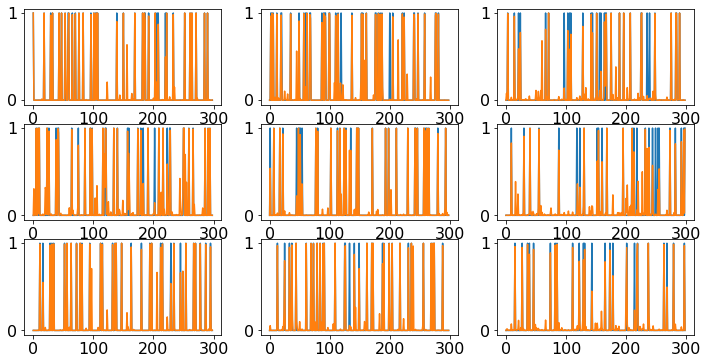

In [8]:
fig,ax = plt.subplots(3,3)
for i in range(Nclasses):
    ax[np.int(i/3),np.mod(i,3)].plot(ymatrix[1:300,i])
    ax[np.int(i/3),np.mod(i,3)].plot(phi[i,1:300])


(785, 9)


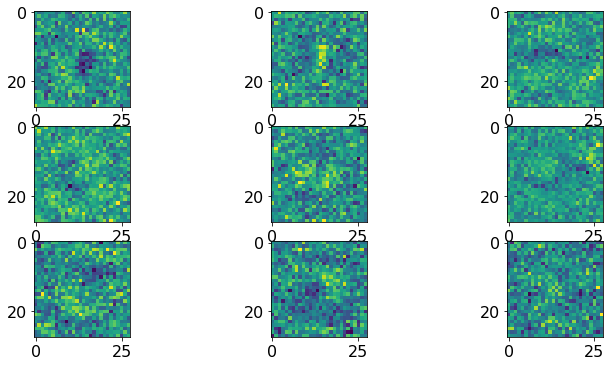

In [9]:
print(W.shape)
fig,ax = plt.subplots(3,3)
for i in range(Nclasses):
    digitimage = np.reshape(W[0:-1,i],(28,28))
    ax[np.int(i/3),np.mod(i,3)].imshow(digitimage)